서울시 행정구역 좌표계(wgs:1984) 데이터 적용

https://data.seoul.go.kr/dataList/OA-11677/M/1/datasetView.do

ITRF:2000의 좌표 변환이 적용X,  WGS:1984 좌표를 활용해 다시 변환 적용할 것

In [2]:
! pip install geopandas
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Point,Polygon
import shapely.geometry as geometry
import pandas as pd
import seaborn as sns

     |████████████████████████████████| 931kB 4.8MB/s 
     |████████████████████████████████| 10.4MB 46.4MB/s 
     |████████████████████████████████| 14.7MB 313kB/s 


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [32]:
from pyproj import Proj,transform

proj_WGS84 = Proj(init='epsg:4326') # epsg:4326
proj_UTMK = Proj(init='epsg:5186')
def transform_w84_to_utmk(df):
    return pd.Series(transform(proj_WGS84,proj_UTMK,df['x'],df['y']),index=['x','y'])

/usr/local/lib/python3.6/dist-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))
/usr/local/lib/python3.6/dist-packages/pyproj/crs/crs.py:294: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  projstring = _prepare_from_string(" ".join((projstring, projkwargs)))
/usr/local/lib/python3.6/dist-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axi

In [0]:
Gu = gpd.read_file('/content/drive/My Drive/Colab Notebooks/data/공모전/동작구_공모전/구.shp')

In [0]:
Dongjak=Gu[Gu['SIG_KOR_NM']=='동작구']

In [0]:
num=0
kk={}
for idx,row in Dongjak.iterrows():
     for pt in list(row['geometry'].exterior.coords): 
        kk[num] = pt
        num+=1

In [0]:
jak=pd.DataFrame(kk).T

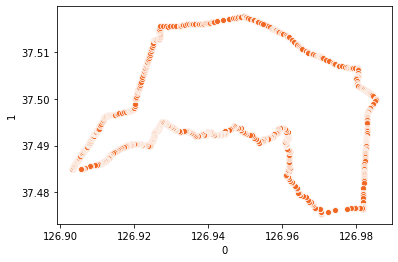

In [56]:
sns.scatterplot(jak[0],jak[1],color='#f16824')

In [0]:
for idx,row in Dongjak.iterrows():
  coords=list(row['geometry'].exterior.coords)

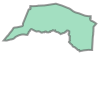

In [58]:
poly = Polygon(coords)
Polygon(coords)

In [0]:
x_min=jak[0].min()
x_max=jak[0].max()
y_min=jak[1].min()
y_max=jak[1].max()
p1 = [x_min,y_min]
p2 = [x_min,y_max]
p3 = [x_max,y_min]
p4 = [x_max,y_max]

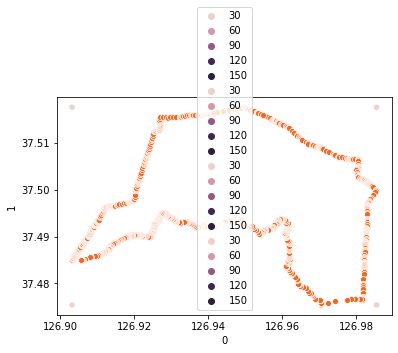

In [60]:
sns.scatterplot(p1[0],p1[1],p1)
sns.scatterplot(p2[0],p2[1],p2)
sns.scatterplot(p3[0],p3[1],p3)
sns.scatterplot(p4[0],p4[1],p4)
sns.scatterplot(jak[0],jak[1],color='#f16824')

In [0]:
x_np=np.random.uniform(x_min,x_max,100000)
y_np=np.random.uniform(y_min,y_max,100000)

In [0]:
df=pd.DataFrame({'x':x_np,
                 'y':y_np})

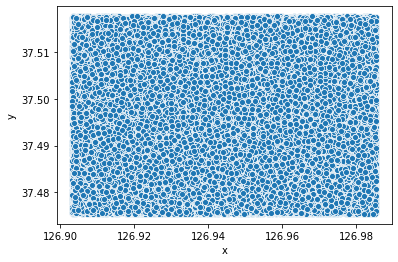

In [63]:
sns.scatterplot(df['x'],df['y'])

In [0]:
for idx in df.index:
  point=Point(df.loc[idx,'x'],df.loc[idx,'y'])
  if point.within(poly)==False:
    df.drop(idx,inplace=True)

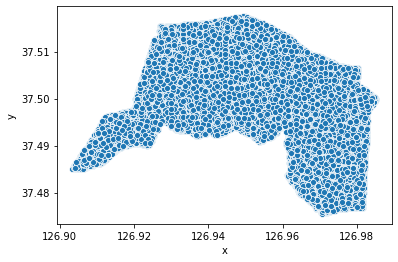

In [65]:
sns.scatterplot(df['x'],df['y'])

In [66]:
df.shape

(48154, 2)

In [67]:
df.head()

,x,y
0,126.948581,37.504435
1,126.950668,37.500260
2,126.924903,37.491784
5,126.963313,37.482444
7,126.949850,37.493443


In [0]:
df[['new_x','new_y']] = df.apply(transform_w84_to_utmk, axis=1)

In [0]:
df.to_csv('/content/drive/My Drive/Colab Notebooks/data/공모전/동작구_공모전/동작구xy.csv')